<br>
<br>
<font face="微软雅黑" size=7 color=#000000 >LA AirBNB Analysis (Zoe Wu)

In this notebook, I will be analyzing the LA AirBnB Dataset using visualizations and learning models. For analysis, I will follow the **CRISP-DM process**.

<font  color=#00008B ><font face="微软雅黑" size=6  >_TABLE OF CONTENTS_</font>

<br><font face="微软雅黑" size=4  >**_Business Understanding_**</font>
<br>_Determine business objectives_
<br>_Assess situation_
<br>_Determine data mining goals_



<br><font face="微软雅黑" size=4  >**_Data Understanding_**</font>
<br>_Collect initial data_
<br>_Describe data_


<br><font face="微软雅黑" size=4 >**_Data Preparation_**</font>
<br>_Select data_
<br>_Clean data_


<br><font face="微软雅黑" size=4  >**_Data Exploratory and Modelling_**</font>
<br>_How can we predict the listing price/reviews_score?_
<br>_What are costomers complain most about?_
<br>_Which geographical locations should AirBNB pay more attention to?_
<br>_Which price range should AirBNB pay more attention to?_



<br><font face="微软雅黑" size=6 >BUSINESS UNDERSTANDING</font>

<br><font face="微软雅黑" size=5 >**Determine business objectives**</font> 
<br><font face="微软雅黑" size=4 >Background</font> 
<br>Started in 2008, Airbnb has already become a popular choice for travellers around the world. However, there are many potential problems behind the fast expansion of Airbnb, for example, the increase of negative reviews rate year by year. In this report, I am going to focus on the Airbnb in Los Angeles and provide actionable insights on how to increase the customers' experience. 

<br><font face="微软雅黑" size=4 >Business objectives</font> 
<br>How can Airbnb improve the costomers' experience and build a better brand reputation in LA?

<br><font face="微软雅黑" size=4 >Business success criteria</font> 
<br>Provide actionable insights into how to improve the AirBNB costomers' experience in a most effective way in LA?

<br><font face="微软雅黑" size=5 >**Assess situation**</font> 
<br><font face="微软雅黑" size=4 >Resources</font> 
<br>Data: InsideAirbnb Website (http://insideairbnb.com/)
<br>Tools: Python, Jupyter Notebook (Anaconda)

<br><font face="微软雅黑" size=4 >Requirements, assumptions and constraints</font> 
<br>1、Customer review could serve as a faithful reflection of the service provided by the business.
<br>2、Positive reviews could contribute to the brand reputation and consequently increase the avenue stream.

<br><font face="微软雅黑" size=5 >**Determine data mining goals**</font> 
<br><font face="微软雅黑" size=4 >Data mining goals</font>
<br>What are costomers complain most about?
<br>Which geographical locations should AirBNB pay more attention to?
<br>Which price range should AirBNB pay more attention to?

<br><font face="微软雅黑" size=4 >Data mining success criteria</font>
<br>Figure out the neighborhoods and price ranges that AirBNB should pay more attention to as well as the problems customers complain most about regarding a listing.



<br><font face="微软雅黑" size=6 >DATA UNDERSTANDING</font>

<font face="微软雅黑" size=5 color=#000000 >Collect raw data

<br>The data covers all Los Angeles listing details, customer reviews and associated geolocation information collected on 7th of April 2021 and is published in a form of csv files. Data is refreshed periodically on the site, but the links for previous versions of data are still available.

<br>**listing_details.csv** - Detailed Listings data for LA
<br>**calendar_details.csv** - Detailed Calendar Data for listings in LA
<br>**review_details.csv** - Detailed Review Data for listings in LA
<br>**review_summary.csv** - Summary Review data and Listing ID
<br>**listing_summary.csv**- Summary Listings data for LA
<br>**neighbourhoods.csv**- Neighbourhood list for geo filter.
<br>**neighbourhoods.geojson** - GeoJSON file of neighbourhoods of the city

<br>**NOTES:**
<br>1、The below code will import all the csv files for further analysis and exploration. 
<br>2、To preserve multiple languages ‘utf-8’ encoding will be used across the files.
<br>3、Information contained within the calendar is already present in the listing details so we will not use it as well.

<font face="微软雅黑" size=2 color=#000000 >This notebook contains part of my analysis, for a well-rounded view of the analysis process, please refer to the EXCEL for more information. 


<font face="微软雅黑" size=5 color=#000000 >Describe data

In [ ]:
#import packages

import pandas as pd
import numpy as np
from pathlib import Path

import requests
from tqdm import tqdm

import numpy as np
import pandas as pd
!pip install geopandas
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
!pip install jupyter altair vega
import altair as alt

import datetime
import time

In [135]:
# Load Detailed review dataset
df_rev_d = pd.read_csv("reviews_d.csv")
# Load Detailed listings dataset
df_lst_d = pd.read_csv("listings_d.csv")
# Load summarized review dataset
df_rev_s = pd.read_csv("reviews_s.csv")
# Load summarized listing datase
df_lst_s = pd.read_csv("listings_s.csv")

In [136]:
# Load neighbourhood dataset
df_nei = pd.read_csv("neighbourhoods.csv")
gdf = gpd.read_file('neighbourhoods.geojson')

In [5]:
#Detailed review dataset
df_rev_d.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...


In [6]:
df_rev_d.info()
df_rev_d.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069848 entries, 0 to 1069847
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1069848 non-null  int64 
 1   id             1069848 non-null  int64 
 2   date           1069848 non-null  object
 3   reviewer_id    1069848 non-null  int64 
 4   reviewer_name  1069844 non-null  object
 5   comments       1068844 non-null  object
dtypes: int64(3), object(3)
memory usage: 49.0+ MB


(1069848, 6)

In [7]:
#Features with non-zero number of missing values
df_rev_d.loc[:, df_rev_d.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

comments         1004
reviewer_name       4
dtype: int64

In [8]:
#Summary information for string features
df_rev_d.describe(include=['object'])

,date,reviewer_name,comments
count,1069848,1069844,1068844
unique,3860,111813,1024822
top,2019-11-11,Michael,Great place
freq,1864,9113,1368


In [9]:
#summarized review dataset
df_rev_s.head(5)

,listing_id,date
0,109,2011-08-15
1,109,2016-05-15
2,2708,2014-06-09
3,2708,2014-06-23
4,2708,2015-07-25


In [10]:
df_rev_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069848 entries, 0 to 1069847
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1069848 non-null  int64 
 1   date        1069848 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.3+ MB


In [11]:
#Features with non-zero number of missing values
df_rev_s.loc[:, df_rev_s.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [12]:
#Summary information for string features
df_rev_s.describe(include=['object'])

,date
count,1069848
unique,3860
top,2019-11-11
freq,1864


In [13]:
#Detailed listings dataset
df_lst_d.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20210207181900,2021-02-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20210207181900,2021-02-09,Runyon Canyon | Beau Furn Mir Mini-Suite Fire...,Run Runyon Canyon<br /><br />Beautifully Furni...,"Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,10.0,10.0,10.0,NaN,t,2,0,2,0,0.34
2,2732,https://www.airbnb.com/rooms/2732,20210207181900,2021-02-09,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,9.0,10.0,9.0,228269,f,2,1,1,0,0.18


In [49]:
df_lst_d.info()
df_lst_d.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31900 non-null  int64  
 1   listing_url                                   31900 non-null  object 
 2   scrape_id                                     31900 non-null  int64  
 3   last_scraped                                  31900 non-null  object 
 4   name                                          31899 non-null  object 
 5   description                                   30751 non-null  object 
 6   neighborhood_overview                         20185 non-null  object 
 7   picture_url                                   31900 non-null  object 
 8   host_id                                       31900 non-null  int64  
 9   host_url                                      31900 non-null 

(31900, 74)

In [15]:
#Features with non-zero number of missing values
df_lst_d.loc[:, df_lst_d.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

calendar_updated               31900
bathrooms                      31900
license                        24919
host_about                     12733
neighborhood_overview          11715
neighbourhood                  11714
host_response_rate              9536
host_response_time              9536
review_scores_value             8229
review_scores_location          8226
review_scores_checkin           8223
review_scores_communication     8216
review_scores_accuracy          8214
review_scores_cleanliness       8213
review_scores_rating            8042
reviews_per_month               7681
first_review                    7681
last_review                     7681
host_acceptance_rate            7512
host_neighbourhood              6227
bedrooms                        3688
description                     1149
beds                             418
host_location                    112
bathrooms_text                    43
host_total_listings_count         35
host_listings_count               35
h

In [16]:
#Summary information for string features
df_lst_d.describe(include=['object'])

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,31900,31900,31899,30751,20185,31900,31900,31865,31865,31788,...,31900,31857,31900,31900,31900,31900,24219,24219,6981,31900
unique,31900,5,30949,28723,17014,30602,18380,7023,3738,858,...,4,49,30082,1144,2,5,3047,1887,3844,2
top,https://www.airbnb.com/rooms/10788613,2021-02-09,Boutique Hostel,Boutique hostel is one of the best hostel in L...,"Located in LA’s most famous neighborhood, this...",https://a0.muscache.com/pictures/b8f67b03-6e16...,https://www.airbnb.com/users/show/107434423,David,2016-12-16,"Los Angeles, California, United States",...,Entire home/apt,1 bath,"[""Long term stays allowed""]",$100.00,t,2021-02-09,2019-07-07,2021-01-31,Exempt - This listing is a transient occupancy...,f
freq,1,18019,67,66,33,66,228,267,239,14892,...,20762,13774,93,753,31100,18019,50,455,810,20105


In [18]:
#summarized listing datase
df_lst_s.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,2016-05-15,0.02,1,0
1,2708,Runyon Canyon | Beau Furn Mir Mini-Suite Fire...,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,71,30,28,2020-11-08,0.34,2,315
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,155,1,21,2019-12-27,0.18,2,365


In [19]:
df_lst_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31900 non-null  int64  
 1   name                            31899 non-null  object 
 2   host_id                         31900 non-null  int64  
 3   host_name                       31865 non-null  object 
 4   neighbourhood_group             31900 non-null  object 
 5   neighbourhood                   31900 non-null  object 
 6   latitude                        31900 non-null  float64
 7   longitude                       31900 non-null  float64
 8   room_type                       31900 non-null  object 
 9   price                           31900 non-null  int64  
 10  minimum_nights                  31900 non-null  int64  
 11  number_of_reviews               31900 non-null  int64  
 12  last_review                     

In [20]:
#Features with non-zero number of missing values
df_lst_s.loc[:, df_lst_s.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

reviews_per_month    7681
last_review          7681
host_name              35
name                    1
dtype: int64

In [21]:
#Summary information for string features
df_lst_s.describe(include=['object'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,31899,31865,31900,31900,31900,24219
unique,30949,7023,3,262,4,1887
top,Boutique Hostel,David,City of Los Angeles,Venice,Entire home/apt,2021-01-31
freq,67,267,17701,1594,20762,455


In [22]:
#LA neighbourhood datase
df_nei.head(3)

,neighbourhood_group,neighbourhood
0,City of Los Angeles,Adams-Normandie
1,City of Los Angeles,Arleta
2,City of Los Angeles,Arlington Heights


In [23]:
df_nei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  270 non-null    object
 1   neighbourhood        270 non-null    object
dtypes: object(2)
memory usage: 4.3+ KB


In [24]:
#Features with non-zero number of missing values
df_nei.loc[:, df_nei.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [25]:
#Summary information for string features
df_nei.describe(include=['object'])

,neighbourhood_group,neighbourhood
count,270,270
unique,3,270
top,City of Los Angeles,West Hollywood
freq,114,1


<AxesSubplot:>

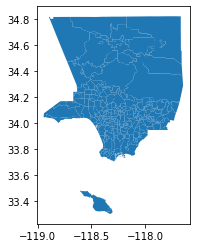

In [26]:
#LA neighbourhood Json File
gdf.plot()

In [27]:
#Features with non-zero number of missing values
gdf.loc[:, gdf.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [28]:
#Summary information for string features
gdf.describe(include='object')

,neighbourhood,neighbourhood_group
count,270,270
unique,270,3
top,West Hollywood,City of Los Angeles
freq,1,114


<font face="微软雅黑" size=6 color=#000000 >DATA PREPARATION

<font face="微软雅黑" size=5 color=#000000 >Select Data

In [137]:
#creat a copy of the original dataset for possible later use
df_lst_d1=df_lst_d

In [138]:
#drop useless features
df_lst_d1.drop(['scrape_id'], axis=1,inplace=True)
df_lst_d1.drop(['listing_url'], axis=1,inplace=True)
df_lst_d1.drop(['picture_url'], axis=1,inplace=True)
df_lst_d1.drop(['host_url'], axis=1,inplace=True)
df_lst_d1.drop(['host_thumbnail_url'], axis=1,inplace=True)                        
df_lst_d1.drop(['host_picture_url'], axis=1,inplace=True)
df_lst_d1.drop(['calendar_last_scraped'], axis=1,inplace=True)
df_lst_d1.drop(['last_scraped'], axis=1,inplace=True) 
df_lst_d1.drop(['host_name'], axis=1,inplace=True)
df_lst_d1.drop(['name'], axis=1,inplace=True) 
df_lst_d1.drop(['host_about'], axis=1,inplace=True)
df_lst_d1.drop(['bathrooms_text'], axis=1,inplace=True)
df_lst_d1.drop(['neighborhood_overview'], axis=1,inplace=True)
df_lst_d1.drop(['description'], axis=1,inplace=True)


<font face="微软雅黑" size=5 color=#000000 >Clean Data (Missing Value)

In [139]:
#remove all columns with more than 50% missing values. 
miss_listings = df_lst_d1.isnull().sum() / len(df_lst_d1)
miss_gr_05 = df_lst_d1.columns[miss_listings > 0.5]
df_lst_d1 = df_lst_d1.drop(miss_gr_05, axis=1)

In [140]:
#replacing all NaN values in 'reviews_per_month' with 0
df_lst_d1.fillna({'reviews_per_month':0}, inplace=True)
#df_lst_s1.fillna({'reviews_per_month':0}, inplace=True)

In [141]:
#replacing all NaN values in 'host_response_rate' with mean value
df_lst_d1[['host_response_rate']] = df_lst_d1['host_response_rate'].apply(lambda col: float(str(col).replace("%", "")))
df_lst_d1['host_response_rate'] = df_lst_d1['host_response_rate'].fillna(np.mean(df_lst_d1['host_response_rate']));

In [142]:
#replacing all NaN values in 'host_response_time' with 'not provided'
df_lst_d1['host_response_time'] = df_lst_d1['host_response_time'].fillna('not provided')

In [143]:
#replacing all NaN values in  'neighborhook', and 'host_neighbourhood' with ''
df_lst_d1['neighbourhood'] = df_lst_d1['neighbourhood'].fillna('')
df_lst_d1['host_neighbourhood'] = df_lst_d1['host_neighbourhood'].fillna('')


In [144]:
#replacing all NaN values in 'host_acceptance_rate' with mean value
df_lst_d1[['host_acceptance_rate']] = df_lst_d1['host_acceptance_rate'].apply(lambda col: float(str(col).replace("%", "")))
df_lst_d1['host_acceptance_rate'] = df_lst_d1['host_acceptance_rate'].fillna(np.mean(df_lst_d1['host_acceptance_rate']));

In [145]:
#replacing all NaN values in 'reviews_scores_...' with mean value
df_lst_d1['review_scores_value'] = df_lst_d1['review_scores_value'].fillna(np.mean(df_lst_d1['review_scores_value']));
df_lst_d1['review_scores_location'] = df_lst_d1['review_scores_location'].fillna(np.mean(df_lst_d1['review_scores_location']));
df_lst_d1['review_scores_checkin'] = df_lst_d1['review_scores_checkin'].fillna(np.mean(df_lst_d1['review_scores_checkin']));
df_lst_d1['review_scores_communication'] = df_lst_d1['review_scores_communication'].fillna(np.mean(df_lst_d1['review_scores_communication']));
df_lst_d1['review_scores_accuracy'] = df_lst_d1['review_scores_accuracy'].fillna(np.mean(df_lst_d1['review_scores_accuracy']));
df_lst_d1['review_scores_cleanliness'] = df_lst_d1['review_scores_cleanliness'].fillna(np.mean(df_lst_d1['review_scores_cleanliness']));
df_lst_d1['review_scores_rating'] = df_lst_d1['review_scores_rating'].fillna(np.mean(df_lst_d1['review_scores_rating']));



In [146]:
#examining the dataset after dealing with the missing value
df_lst_d1.loc[:, df_lst_d1.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)

last_review                  7681
first_review                 7681
bedrooms                     3688
beds                          418
host_location                 112
host_identity_verified         35
host_has_profile_pic           35
host_total_listings_count      35
host_listings_count            35
host_is_superhost              35
host_since                     35
maximum_maximum_nights          1
minimum_maximum_nights          1
maximum_minimum_nights          1
minimum_minimum_nights          1
minimum_nights_avg_ntm          1
maximum_nights_avg_ntm          1
dtype: int64

In [147]:
#drop the left rows with missing value
df_lst_d1.dropna(axis=0, how='any', inplace=True)

In [148]:
#examining the dataset after dropping the missing value
df_lst_d1.loc[:, df_lst_d1.isnull().sum() > 0].isnull().sum().sort_values(ascending=False)
df_lst_d1.shape

(21156, 57)

<font face="微软雅黑" size=5 color=#000000 >Clean Data (Categorical Feature)

In [149]:
df_lst_d1.info()
#df_lst_d.host_neighbourhood
#Features with zero variance
#df_lst_d.loc[:, df_lst_d.nunique() <= 1].nunique().sort_values()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21156 entries, 0 to 31792
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            21156 non-null  int64  
 1   host_id                                       21156 non-null  int64  
 2   host_since                                    21156 non-null  object 
 3   host_location                                 21156 non-null  object 
 4   host_response_time                            21156 non-null  object 
 5   host_response_rate                            21156 non-null  float64
 6   host_acceptance_rate                          21156 non-null  float64
 7   host_is_superhost                             21156 non-null  object 
 8   host_neighbourhood                            21156 non-null  object 
 9   host_listings_count                           21156 non-null 

In [150]:
#creat a copy of the original dataset for possible later use
df_lst_d2=df_lst_d1

In [151]:
#Gathering the different types of Non-numerical features
categorical_attributes = [ 'host_location', 'host_response_time','neighbourhood','host_neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type'];
# We one-hot-encode Categorical attributes with dummies
dummies_categorical_attributes=pd.get_dummies(df_lst_d2[categorical_attributes])
df_lst_d2=pd.concat([df_lst_d2,dummies_categorical_attributes],axis=1)
df_lst_d2.drop(categorical_attributes,axis=1,inplace=True)

In [154]:
#examining the change
df_lst_d2.head(2)
df_lst_d2.shape

(21156, 1773)

<font face="微软雅黑" size=5 color=#000000 >Clean Data (Boolean Feature)

In [155]:
# Boolean types are replaced with a 0 or 1
bool_attributes = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified','has_availability','instant_bookable']
def repl_f_t(l):
    l = l.replace('f', 0);
    l = l.replace('t', 1);
    return l
    
df_lst_d2_bool= df_lst_d2[bool_attributes].apply(lambda col: repl_f_t(col));
df_lst_d2.drop(bool_attributes,axis=1,inplace=True)
df_lst_d2=pd.concat([df_lst_d2,df_lst_d2_bool],axis=1)

In [156]:
#examining the changes
df_lst_d2.shape

(21156, 1773)

<font face="微软雅黑" size=5 color=#000000 >Clean Data (Currency Feature)

In [157]:
# Currency attributes can be converted to Floats by removing the dollar symbol and commas
money_attributes = ['price']
df_lst_d2_money = df_lst_d1[money_attributes].apply(lambda col: col.str.replace("$", "").str.replace(",","").astype('float'))
df_lst_d2.drop(money_attributes,axis=1,inplace=True)
df_lst_d2=pd.concat([df_lst_d2,df_lst_d2_money],axis=1)

In [158]:
#examining changes
df_lst_d2.price

0        115.0
1         71.0
2        155.0
4         42.0
5         65.0
         ...  
31594     89.0
31661     80.0
31693     80.0
31720     85.0
31792    196.0
Name: price, Length: 21156, dtype: float64

<font face="微软雅黑" size=5 color=#000000 >Clean Data (Array Feature)

In [159]:
# Arrays are a little complicated. First, we remove the extraneous characters in them

def get_arr(l):
    l = l.str.replace('[', '');
    l = l.str.replace(']', '');
    l = l.str.replace('{', '');
    l = l.str.replace('}', '');
    l = l.str.replace("'", '');
    l = l.str.replace('"', '');
    return l;

array_attributes = ['host_verifications', 'amenities']
df_lst_d2_arr_fixed = df_lst_d2[array_attributes].apply(lambda col: get_arr(col));

# Next, we get encoded one-hot-dummies for each value in them, prefixed by the column name.
array_attri_dummy_arrs = [];
for col in df_lst_d2_arr_fixed.columns:
    dummy_arrs = df_lst_d2_arr_fixed[col].str.get_dummies(sep=',');
    dummy_arrs = dummy_arrs.add_prefix(col + '_');
    array_attri_dummy_arrs.append(dummy_arrs);
    
df_lst_d2_arr_fixed = pd.concat(array_attri_dummy_arrs, axis=1);

df_lst_d2.drop(array_attributes,axis=1,inplace=True)
df_lst_d2=pd.concat([df_lst_d2,df_lst_d2_arr_fixed],axis=1)


In [160]:
#examing the changes
df_lst_d2.shape

(21156, 2789)

<font face="微软雅黑" size=5 color=#000000 >Clean Data (Date Feature)

In [161]:
date_attributes = ['host_since', 'first_review', 'last_review']
# Date types are factorized into numerical ints
df_lst_d2_date_factors = df_lst_d2[date_attributes].apply(lambda col: pd.factorize(col, sort=True)[0]);
df_lst_d2.drop(date_attributes,axis=1,inplace=True)
df_lst_d2=pd.concat([df_lst_d2,df_lst_d2_date_factors],axis=1)

In [162]:
#examine
df_lst_d2.info()
df_lst_d2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21156 entries, 0 to 31792
Columns: 2789 entries, id to last_review
dtypes: float64(23), int64(1042), uint8(1724)
memory usage: 206.8 MB


(21156, 2789)

<font face="微软雅黑" size=5 color=#000000> Construct and Integrate Data

In [166]:
#creat a copy of the original dataset for possible later use
df_lst_d3=df_lst_d2

In [179]:
df_lst_d3['avg_score']=(df_lst_d3['review_scores_accuracy']+df_lst_d3['review_scores_cleanliness']+df_lst_d3['review_scores_checkin']+df_lst_d3['review_scores_communication']+df_lst_d3['review_scores_location']+df_lst_d3['review_scores_value'])/7

0        7.428571
1        8.571429
2        7.857143
4        8.428571
5        8.285714
           ...   
31594    8.285714
31661    8.571429
31693    8.571429
31720    8.428571
31792    8.571429
Name: avg_score, Length: 21156, dtype: float64

<font face="微软雅黑" size=6 color=#000000 >DATA EXPLORATORY

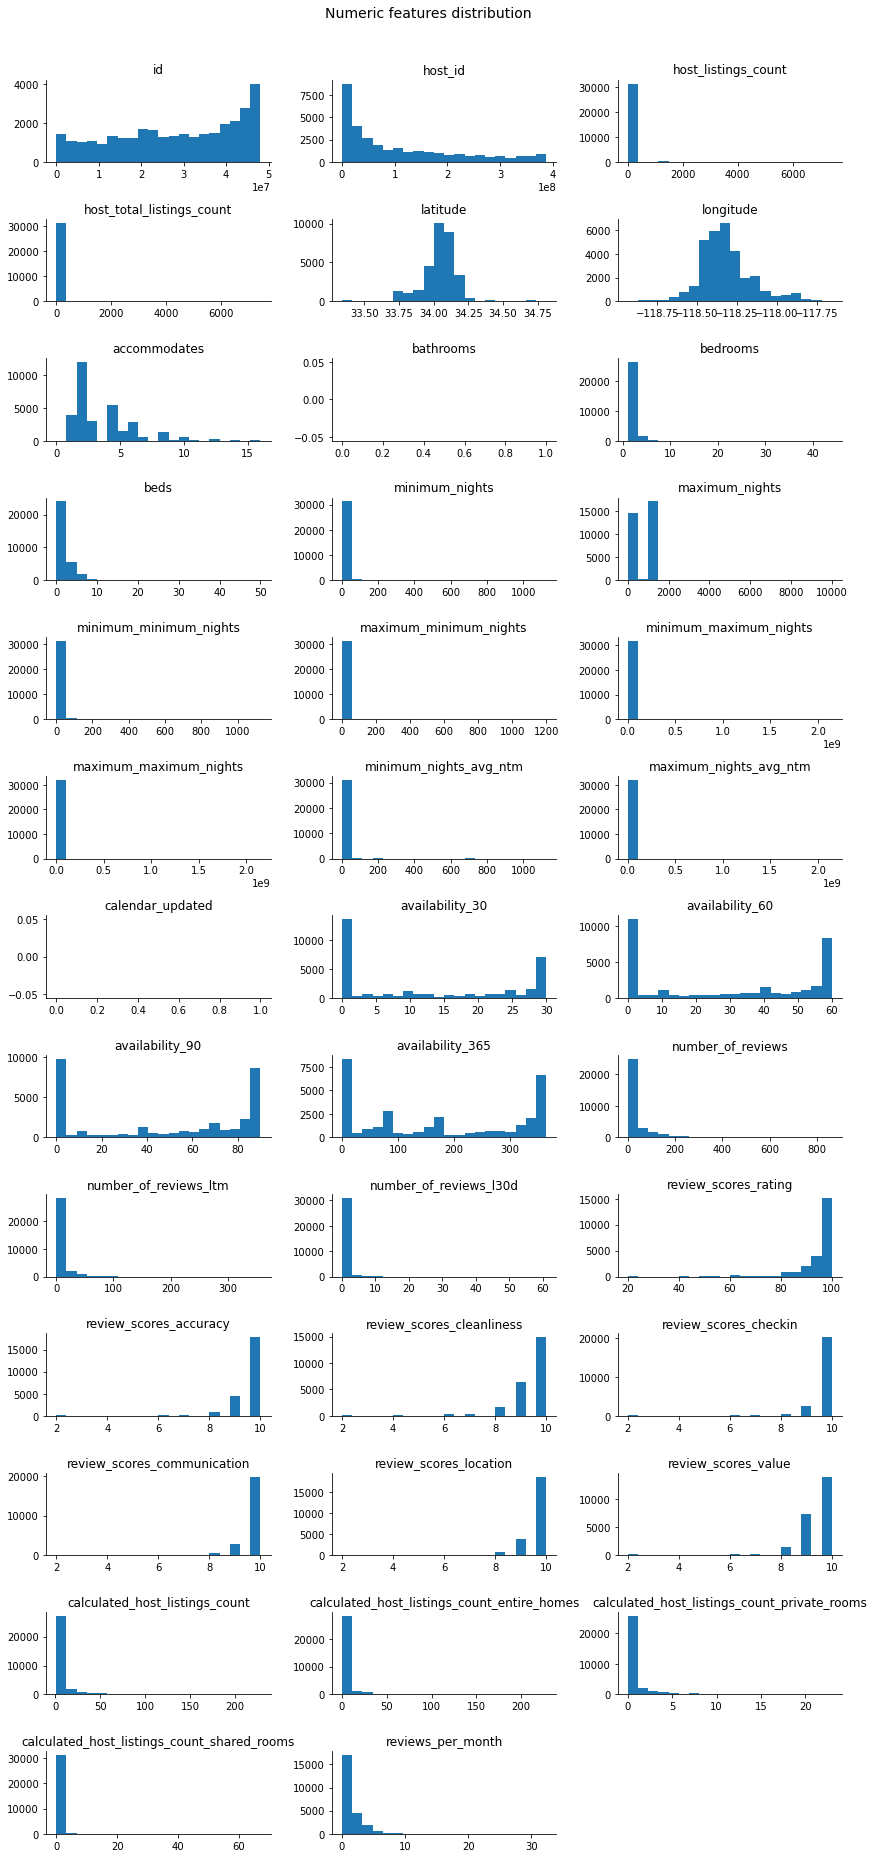

In [180]:
#Numeric features distribution
df_lst_d.hist(figsize=(12, 30), bins=20, grid=False, layout=(15, 3))
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])

Top most correlated columns:
review_scores_accuracy
review_scores_value
review_scores_communication
review_scores_cleanliness
review_scores_checkin
review_scores_location


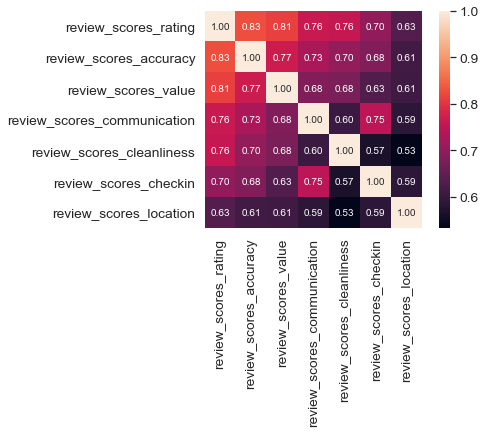

In [261]:
#correlation of different scores plot
numeric_feature=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

df_lst_corplt=df_lst_d[numeric_feature]

def plot_topn_correlation_matrix_with_target(df, target_col_name, k=10):
  corrmat = df.corr()
  top_correlated_columns = corrmat.nlargest(k, target_col_name)[target_col_name].index
  cm = np.corrcoef(df[top_correlated_columns].values.T)
  sns.set(font_scale=1.25)
  hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': k}, yticklabels=top_correlated_columns.values, xticklabels=top_correlated_columns.values)
  
  return top_correlated_columns.values

top_correlated_columns = plot_topn_correlation_matrix_with_target(df_lst_corplt, 'review_scores_rating')

print("Top most correlated columns:")
for i in top_correlated_columns:
  if(i!='review_scores_rating'):
    print(i)

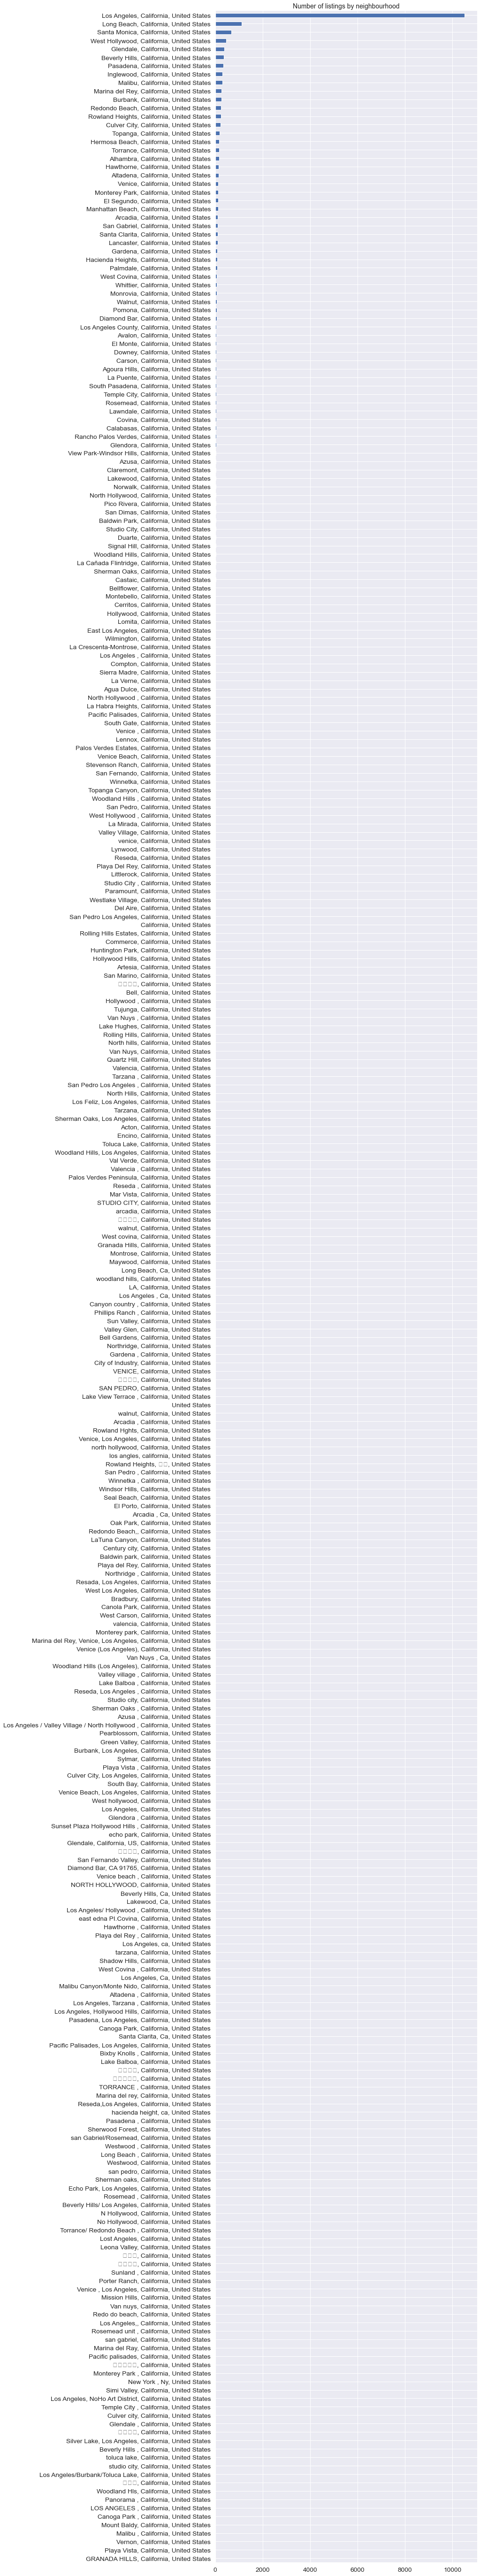

In [263]:
#Number of listings by neighbourhood
df_lst_d['neighbourhood'].value_counts().sort_values().plot.barh(figsize=(10, 100));
sns.despine()
plt.title('Number of listings by neighbourhood', fontsize=14);

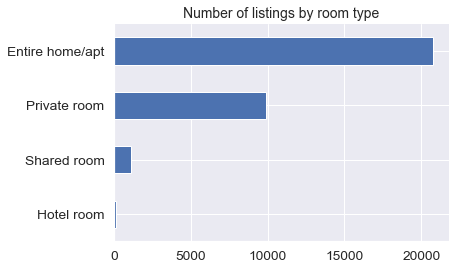

In [265]:
#Number of listings by room type
df_lst_d['room_type'].value_counts(dropna=False).sort_values().plot.barh()
sns.despine()
plt.title('Number of listings by room type', fontsize=14);

<font face="微软雅黑" size=6 color=#000000 >DATA MODELLING

<font face="微软雅黑" size=5 color=#000000 >Model 1: Using RandomForestRegressor to predict the average score

In [182]:
!pip install -U scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import math


#Predict the avg_score
l_X, l_y = df_lst_d3.drop('avg_score', axis=1), df_lst_d3['avg_score'];
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.33, random_state=1024);

rf_classifier = RandomForestRegressor(n_estimators=400, criterion='mse', random_state=1024);
rf_classifier.fit(l_X_train, l_y_train)

l_y_pred = rf_classifier.predict(l_X_test);
l_y_pred_tr = rf_classifier.predict(l_X_train);

print(math.sqrt(mean_squared_error(l_y_test, l_y_pred)))

Requirement already up-to-date: scikit-learn in /Users/wuzoey/opt/anaconda3/lib/python3.8/site-packages (0.24.2)
0.06235389553625862


<font face="微软雅黑" size=5 color=#000000 >Model 2: Using NLP to conduct sentiment analysis 

<font face="微软雅黑" size=5 color=#000000 >STEP 1: Add labels to reviews

In [7]:
#build the vader analyzer
!pip install vaderSentiment
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wuzoey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
#Using Vader Analyzer to analyze the negative reviews
df_rev_d['comments'] = df_rev_d['comments'].astype(str)
df_rev_d['compound'] = df_rev_d['comments'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df_rev_d

,listing_id,id,date,reviewer_id,reviewer_name,comments,compound
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...,0.0000
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...,0.9316
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...,0.8126
3,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...,0.9909
4,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...,0.9672
...,...,...,...,...,...,...,...
1069843,48014406,728886467,2021-02-04,181366823,Jennifer,Stayed here for a night and it was just what w...,0.7755
1069844,48024697,729648516,2021-02-07,89652279,Joanna,nice :),0.7003
1069845,48033228,729077755,2021-02-05,75024894,Gary,great view,0.6249
1069846,48033228,729670618,2021-02-07,367100663,Biannca,Got this place last minute and I wish I could ...,0.9574


In [11]:
#add label to the reviews
def compute_sati(x):
    if x>= 0.05:
        return 1
    elif x<= -0.05:
        return -1
    else:
        return 0
    

df_rev_d["cus_sati"] =df_rev_d["compound"].apply(compute_sati)

In [12]:
df_rev_d

,listing_id,id,date,reviewer_id,reviewer_name,comments,compound,cus_sati
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...,0.0000,0
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...,0.9316,1
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...,0.8126,1
3,2708,14606598,2014-06-23,2247288,Camilla,Charles is just amazing and he made my stay sp...,0.9909,1
4,2708,39597339,2015-07-25,27974696,Fallon,Staying with Chas was an absolute pleasure. He...,0.9672,1
...,...,...,...,...,...,...,...,...
1069843,48014406,728886467,2021-02-04,181366823,Jennifer,Stayed here for a night and it was just what w...,0.7755,1
1069844,48024697,729648516,2021-02-07,89652279,Joanna,nice :),0.7003,1
1069845,48033228,729077755,2021-02-05,75024894,Gary,great view,0.6249,1
1069846,48033228,729670618,2021-02-07,367100663,Biannca,Got this place last minute and I wish I could ...,0.9574,1


In [13]:
#install pandasql
! pip install -U pandasql

Requirement already up-to-date: pandasql in /Users/wuzoey/opt/anaconda3/lib/python3.8/site-packages (0.7.3)


In [14]:
#import pandasql 
import pandasql as psql
from pandasql import sqldf

In [15]:
#find out the negative reviews from the positive reviews
q = "SELECT * FROM df_rev_d WHERE cus_sati <> 1"
df_unsati =psql.sqldf(q)

In [16]:
df_unsati

,listing_id,id,date,reviewer_id,reviewer_name,comments,compound,cus_sati
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...,0.0000,0
1,2708,222420570,2017-12-29,155985882,Manami,ﾎｽﾄはとても親切で英語の発音の仕方など丁寧に教えてくれた｡\n\n部屋はﾘﾋﾞﾝｸﾞを板で...,0.0000,0
2,5728,59744837,2016-01-14,303816,Tracy,The host canceled this reservation 88 days bef...,0.0000,0
3,5728,60341161,2016-01-22,16517963,Katharina,Ich war zwar nur eine Nacht bei Sanni und Ihre...,-0.8748,-1
4,5728,142103781,2017-04-06,99657632,Mariela,"Súper acogedor y diferente, el cuarto es peque...",0.0000,0
...,...,...,...,...,...,...,...,...
76699,47885081,729953921,2021-02-08,245246154,Briaja,Scammer Do Not Book,0.0000,0
76700,47887094,727523477,2021-01-29,345580260,Aierfate,I will book this house again if I go to LA.,0.0000,0
76701,47887618,728896995,2021-02-04,24916090,Benson,Sas place was everything my wife and I needed ...,0.0000,0
76702,47893655,727338825,2021-01-28,378853640,Brian,Can't wait to book again,0.0000,0


In [18]:
# filter out the non_english reviews
df_rev_ana=df_unsati[df_unsati.comments.map(lambda x: x.isascii())]

In [19]:
#output dataframe for further analysis in EXCEL
df_rev_ana.to_csv('review_analysis_alleng.csv')

In [6]:
#reset the index
df_rev_ana=df_rev_ana.reset_index(drop=True)
df_rev_ana

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,compound,cus_sati
0,0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...,0.0000,0
1,2,5728,59744837,2016-01-14,303816,Tracy,The host canceled this reservation 88 days bef...,0.0000,0
2,7,5728,250947570,2018-04-06,3257952,Cloey,As described,0.0000,0
3,8,5728,274631874,2018-06-09,17795184,Grisel,Perfecta estadia! Nos encanto la Tiny House. T...,-0.4724,-1
4,10,5728,304071625,2018-08-08,205421234,Bastien,Wonderfull place to stay in LA near Venice Bea...,0.0000,0
...,...,...,...,...,...,...,...,...,...
35214,76699,47885081,729953921,2021-02-08,245246154,Briaja,Scammer Do Not Book,0.0000,0
35215,76700,47887094,727523477,2021-01-29,345580260,Aierfate,I will book this house again if I go to LA.,0.0000,0
35216,76701,47887618,728896995,2021-02-04,24916090,Benson,Sas place was everything my wife and I needed ...,0.0000,0
35217,76702,47893655,727338825,2021-01-28,378853640,Brian,Can't wait to book again,0.0000,0


<font face="微软雅黑" size=5 color=#000000>STEP 2: Calculate the negative reviews rate 

In [26]:

li_year=df_rev_ana["date"].apply(lambda x:x[:4]).tolist()
dic_year= {'2021': 0,'2020': 0,'2019': 0,'2018': 0,'2017': 0,'2016': 0,'2015': 0,'2014': 0,'2013': 0,'2012': 0,'2011': 0,'2010': 0}
key_list =dic_year.keys()
for i in li_year:
    for x in key_list:
        if i==x:
            dic_year[x]+=1
dic_year

{'2021': 697,
 '2020': 7923,
 '2019': 10688,
 '2018': 6999,
 '2017': 4629,
 '2016': 2539,
 '2015': 1031,
 '2014': 460,
 '2013': 166,
 '2012': 63,
 '2011': 23,
 '2010': 1}

In [31]:
li_year_tot=df_rev_d["date"].apply(lambda x:x[:4]).tolist()
dic_year_tot= {'2021': 0,'2020': 0,'2019': 0,'2018': 0,'2017': 0,'2016': 0,'2015': 0,'2014': 0,'2013': 0,'2012': 0,'2011': 0,'2010': 0}
key_list_tot =dic_year_tot.keys()
for i in li_year_tot:
    for x in key_list_tot:
        if i==x:
            dic_year_tot[x]+=1
dic_year_tot

{'2021': 16995,
 '2020': 208217,
 '2019': 315249,
 '2018': 221354,
 '2017': 142083,
 '2016': 89211,
 '2015': 44467,
 '2014': 19446,
 '2013': 7860,
 '2012': 3321,
 '2011': 1355,
 '2010': 270}

In [33]:
dic_negV_perc= {'2021': 0,'2020': 0,'2019': 0,'2018': 0,'2017': 0,'2016': 0,'2015': 0,'2014': 0,'2013': 0,'2012': 0,'2011': 0,'2010': 0}
key_list_perc=dic_negV_perc.keys()
for i in key_list_perc:
    dic_negV_perc[i]=dic_year[i]/dic_year_tot[i]
dic_negV_perc   
    

{'2021': 0.04101206237128567,
 '2020': 0.03805164804026569,
 '2019': 0.0339033589321457,
 '2018': 0.031619035571979724,
 '2017': 0.032579548573720994,
 '2016': 0.028460615843337703,
 '2015': 0.023185733240380507,
 '2014': 0.023655250437107887,
 '2013': 0.021119592875318068,
 '2012': 0.018970189701897018,
 '2011': 0.016974169741697416,
 '2010': 0.003703703703703704}

In [39]:
#change the dictionary to a dataframe 
df_negV_perc = pd.DataFrame(dic_negV_perc,index=[0]) 
df_negV_perc

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,0.041012,0.038052,0.033903,0.031619,0.03258,0.028461,0.023186,0.023655,0.02112,0.01897,0.016974,0.003704


<font face="微软雅黑" size=5 color=#000000>STEP 3: Using NLTK to find the most common words in negative reviews.

In [ ]:

# Get the date in int type
df_rev_ana["date_num"] = df_rev_ana["date"].apply(lambda str_x: int("".join(str_x.split("-"))))


In [41]:
import nltk
import string
import copy
from nltk.corpus import stopwords

nltk.download('stopwords')
set_stopwords = set(stopwords.words('english'))
set_illegalwords = set_stopwords.union(set(range(10)))
# Punctuation set 
str_punc = string.punctuation + "\n\r"

dic_word_freq_ana = {}


def word_freq(sentence):
    if type(sentence) != str:
        sentence = str(sentence)
    sentence = sentence.lower()
    ls_stc = sentence.strip(str_punc).split(" ")
    for word in ls_stc:
        clean_word = word.strip(str_punc)
        if (clean_word not in set_illegalwords) and clean_word != '':
            if clean_word not in dic_word_freq.keys():
                dic_word_freq[clean_word] = 1
            else:
                dic_word_freq[clean_word] += 1

                
dic_word_freq= {}
df_rev_ana["comments"].apply(word_freq)
dic_word_freq_ana = copy.deepcopy(dic_word_freq)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wuzoey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Create dataframes of frequencies. 
df_word_freq_ana   = pd.DataFrame.from_dict(dic_word_freq_ana, orient = 'index', columns = ["Frequency"])
df_word_freq_ana  .sort_values(by = "Frequency", ascending = False, inplace = True)
df_word_freq_ana

,Frequency
host,9248
place,7594
arrival,6208
reservation,6067
canceled,5856
...,...
that.\r\n\r\nin,1
out.\r\n\r\nday,1
evening.\r\n\r\nday,1
traps.\r\n\r\nday,1


In [7]:
#output for further analysis
df_word_freq_ana.to_csv("word_freq_ana.csv")

<font face="微软雅黑" size=5 color=#000000 >STEP 4: Integrate dataset for further analysis on the listings with high negative reviews rate

In [16]:
df_mer=pd.merge(df_lst_s,df_rev_ana,left_on="id",right_on="listing_id")

In [46]:
df_mer.to_csv('review_analysis_mer.csv')

In [8]:
df_num_nrev_ana=pd.read_csv("num_nrev.csv")

In [11]:
df_mer_nrev=pd.merge(df_lst_s,df_num_nrev_ana,left_on="id",right_on="Listing_id")

In [12]:
df_mer_nrev.rename(columns = {"number of negative reviews": "num_neg_rev"},  inplace=True)
df_mer_nrev

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Listing_id,num_neg_rev
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,2016-05-15,0.02,1,0,109,1
1,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,City of Los Angeles,Del Rey,33.98750,-118.43200,Private room,42,30,310,2020-04-29,2.20,4,1,5728,6
2,5729,Zen Room with Floating Bed near Venice and LAX,9171,Sanni,City of Los Angeles,Del Rey,33.98750,-118.43200,Private room,65,30,230,2020-04-11,1.65,4,283,5729,10
3,5843,Artist Oasis near Venice Beach w/ Beautiful Ga...,9171,Sanni,City of Los Angeles,Del Rey,33.98750,-118.43200,Entire home/apt,130,30,128,2020-08-22,1.08,4,15,5843,4
4,6931,Run Runyon | Beau Furn Rm Dres Rm/Wlk-In Clst...,3008,Chas.,City of Los Angeles,Hollywood,34.09521,-118.34801,Private room,71,30,24,2021-01-15,0.17,2,260,6931,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12308,47885081,Modern 2 BR Apartment in the Best Area of Down...,376006182,Sharait,City of Los Angeles,Atwater Village,34.11421,-118.26498,Entire home/apt,199,2,1,2021-02-08,1.00,2,360,47885081,1
12309,47887094,Luxury Modern Home East Hollywood w/ Rooftop Deck,256687192,Edgar And Zola,City of Los Angeles,Silver Lake,34.09431,-118.28068,Entire home/apt,441,2,2,2021-01-31,2.00,9,354,47887094,1
12310,47887618,LUXURY ENTERTAINERS DELIGHT IN THE HEART OF LA,6986531,Sas,City of Los Angeles,Beverly Grove,34.08622,-118.36661,Entire home/apt,890,1,1,2021-02-04,1.00,1,322,47887618,1
12311,47893655,Fantastic 3bd + Beverly Hills + OPEN SKY DECK ...,120293132,Jordan,City of Los Angeles,Beverly Grove,34.07292,-118.38417,Entire home/apt,329,1,1,2021-01-28,1.00,4,361,47893655,1


In [13]:
df_mer_nrev.to_csv('nrev_analysis.csv')

In [14]:
df_mer_nrev.sort_values(by=["num_neg_rev"], ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Listing_id,num_neg_rev
344,756777,Private Room by LAX,3659692,Chanoma House,Other Cities,El Segundo,33.91920,-118.39797,Private room,49,1,511,2021-01-24,5.12,6,360,756777,55
1806,6044166,Central Los Angeles/ Private Studio.,30906832,Harry,City of Los Angeles,Harvard Heights,34.03776,-118.30285,Entire home/apt,70,1,411,2021-01-23,5.84,4,73,6044166,46
401,879195,Private room with private entrance,3659692,Chanoma House,Other Cities,El Segundo,33.92013,-118.39643,Private room,48,1,426,2021-01-19,4.35,6,0,879195,46
5574,20057869,"SweetHome-Close to Beach, LA Airport &Freeway 405",25174468,Betty,Unincorporated Areas,Del Aire,33.90303,-118.36797,Entire home/apt,149,1,288,2021-02-04,6.69,2,178,20057869,37
72,107970,2 Room Poolside Guesthouse +bikes,552845,Ronan,Other Cities,Long Beach,33.77435,-118.12275,Entire home/apt,40,3,764,2021-01-16,6.54,1,259,107970,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,21999433,T307 - Large top floor 2bed/2bath in Century City,159480876,Urbanlux,City of Los Angeles,West Los Angeles,34.05495,-118.42590,Entire home/apt,210,31,7,2021-01-05,0.19,49,269,21999433,1
6325,21998061,"Stunning Modern Apartment - Top Comfort, Perfe...",74329020,Michael,City of Los Angeles,Pico-Robertson,34.05093,-118.38132,Entire home/apt,110,30,105,2021-01-16,2.76,2,131,21998061,1
6323,21993833,Charming 1920s West Hollywood Bungalow,34457781,Michael,Other Cities,West Hollywood,34.09131,-118.35549,Entire home/apt,109,31,7,2020-05-15,0.19,1,345,21993833,1
6321,21992923,"3rd bd, 1 ba in my peaceful, southwest home.",81704121,Elizabeth,Unincorporated Areas,Sun Village,34.53144,-117.96936,Private room,100,1,23,2020-08-31,0.63,4,342,21992923,1


<font face="微软雅黑" size=5 color=#000000 >STEP 5: Interactive map visualizing the distribution of the negative reviews in LA 

In [41]:
! pip install folium
# Define the world map
import folium
world_map = folium.Map()

# Los Angeles latitude and longitude values
latitude = 34.03
longitude =  -118.15

# Create the map and display the map of LA
LA_map = folium.Map(location=[latitude, longitude], zoom_start=10)

     |████████████████████████████████| 94 kB 243 kB/s eta 0:00:011


In [49]:
LA_map 

In [54]:
# Get the first 1000 listings
limit = 1000
listing_limit = df_mer_nrev.iloc[0:limit,:]

# Initiate a feature group for the listings in the dataframe
listing_location = folium.map.FeatureGroup()

# Loop through the locations of the first 100 listings and add each to the listing_location feature group
for lat, lng, in zip(listing_limit.latitude, listing_limit.longitude):
    listing_location.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius = 4,
            color = "yellow",
            fill = True,
            fill_color = "red",
            fill_opacity = 0.4
        )
    )

# Add listing_location to the LA_map
LA_map = folium.Map(location=[latitude, longitude], zoom_start=10)
LA_map.add_child(listing_location)

In [55]:
from folium import plugins
LA_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# Initiate a mark cluster object for the listings
listing_cluster = plugins.MarkerCluster().add_to(LA_map)

# Loop through the dataframe and add each data point to the mark cluster
for lat,lng,nei, in zip(listing_limit.latitude, listing_limit.longitude, listing_limit.neighbourhood):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=nei,
    ).add_to(listing_cluster)

# Add listing_cluster to the LA_map
LA_map.add_child(listing_cluster)